## IMPORTATION DES MODULES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
#from sklearn.metrics import confusion_matrix

## PRE-TRAITEMENT DES DONNEES

In [2]:
#chargement du dataset
data = pd.read_excel('ml.xlsx')
df = data.copy()

In [3]:
#vérificaton et suppression des doublons
#df.drop_duplicates() pour suppression
df.duplicated().sum()

0

In [4]:
#vérification des données manquantes
df.isna().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

In [5]:
#vérification de l'existence d'une constante
df.nunique()

AGE             50
SEXE             2
TDT              4
PAR             67
CHOLESTEROL    222
GAJ              2
ECG              3
FCMAX          119
ANGINE           2
DEPRESSION      53
PENTE            3
CŒUR             2
dtype: int64

In [6]:
#Encodage des variables catégorielles


def recoder_data(data):
    def recoder(serie):
        return serie.astype('category').cat.codes
    for i in data.select_dtypes('object').columns:
        data[i] = recoder(data[i])

    return data

In [7]:
recoder_data(df).head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,1,0,140,289,0,1,172,0,0.0,0,0
1,49,0,3,160,180,0,1,156,0,1.0,2,1
2,37,1,0,130,283,0,2,98,0,0.0,0,0
3,48,0,1,138,214,0,1,108,1,1.5,2,1
4,54,1,3,150,195,0,1,122,0,0.0,0,0


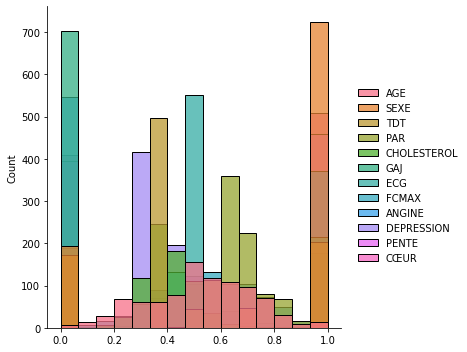

In [15]:
#Normalisation des variables
mms= MinMaxScaler()
df_mms= pd.DataFrame(mms.fit_transform(df),columns=df.columns)

#mas = MaxAbsScaler()
#df_mas= pd.DataFrame(mas.fit_transform(df),columns=df.columns)
#def histo(data):
  # return data.hist(figsize=(20,10))
#histo(df_mms);
sb.displot(data=df_mms);


In [9]:
#segmentation de la DataFrame selon X et y
#xx = df[['AGE','SEXE','TDT','PAR','CHOLESTEROL','GAJ','ECG','FCMAX','ANGINE','DEPRESSION ','PENTE']]
#yy= df[['CŒUR']]


X = df_mms.iloc[:,:11]
y = df_mms.iloc[:,-1:]


#{ APPLICATION DU MODELE DE REGRESSION LOGISTIQUE

In [10]:
#separation des données
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
print(x_train.shape)
print(x_test.shape)

(642, 11)
(276, 11)


In [11]:
#Entrainement du modèle
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)


C:\CONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [16]:
pred=log_reg.predict(x_test)

In [17]:
print(pred)
print(y_test)

[1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1.]
     CŒUR
900   1.0
570   1.0
791   1.0
189   1.0
372   1.0
..    ...
66    0.0
395   1.0
355   1.0
277   1.0
604   0.0

[276 rows x 1 columns]


In [30]:
#Validation du modèle
#confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       109
         1.0       0.90      0.87      0.88       167

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276

0.8623188405797102
